In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile


Signal shape: (3251,)
Datatype: int16
Signal duration: 0.41 seconds


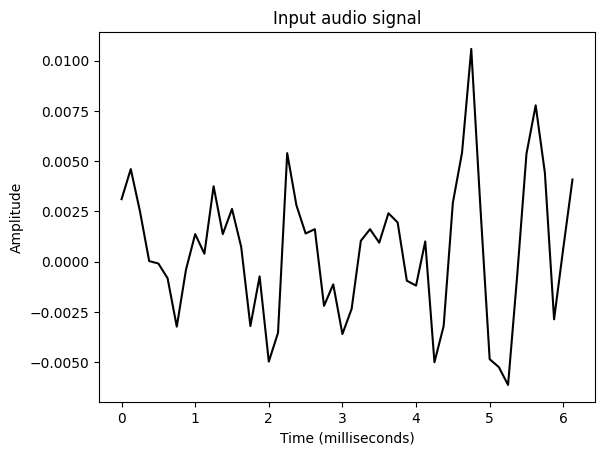

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Read the audio file
sampling_freq, signal = wavfile.read(r'C:\Users\smain\Downloads\apple02.wav')

# Display the params
print('\nSignal shape:', signal.shape)
print('Datatype:', signal.dtype)
print('Signal duration:', round(signal.shape[0] / float(sampling_freq), 2), 'seconds')

# Normalize the signal 
signal = signal / np.power(2, 15)

# Extract the first 50 values
signal = signal[:50]

# Construct the time axis in milliseconds
time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq)

# Plot the audio signal
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

Ce bloc de code pr√©c√©dent permet d'analyser et de visualiser un signal audio √† partir d‚Äôun fichier WAV. Il commence par lire le fichier audio gr√¢ce √† wavfile.read(), r√©cup√©rant ainsi la fr√©quence d‚Äô√©chantillonnage et les donn√©es du signal. Il affiche ensuite des informations essentielles comme la forme du signal, son type de donn√©es et sa dur√©e en secondes. Ensuite, le signal est normalis√© pour √™tre compris entre -1 et 1. Pour faciliter la visualisation, seules les 50 premi√®res valeurs du signal sont extraites. Un axe temporel en millisecondes est ensuite construit en fonction de la fr√©quence d‚Äô√©chantillonnage. Enfin, le code trace l‚Äôamplitude du signal en fonction du temps, permettant d‚Äôobserver les variations du signal sonore sur une courte p√©riode. Ce programme est utile pour analyser des fichiers audio avant un traitement plus approfondi, par exemple en reconnaissance vocale ou traitement du signal.

---

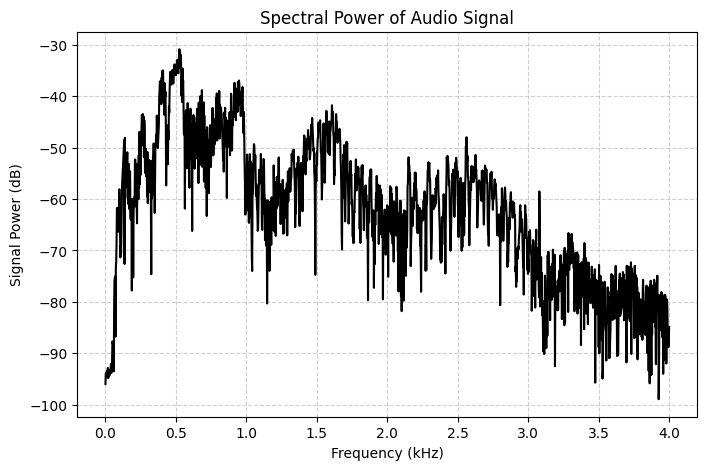

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Read the audio file
sampling_freq, signal = wavfile.read(r'C:\Users\smain\Downloads\apple02.wav')

# Convert to mono if stereo
if len(signal.shape) > 1:
    signal = signal[:, 0]  # Prendre un seul canal

# Normalize the signal dynamically
signal = signal / np.max(np.abs(signal))

# Length of the signal
len_signal = len(signal)
len_half = np.ceil((len_signal + 1) / 2.0).astype(int)

# Compute FFT and normalize
freq_signal = np.fft.fft(signal)
freq_signal = np.abs(freq_signal[:len_half]) / len_signal  # Magnitude
freq_signal **= 2  # Square the magnitude

# Adjust power spectrum (compensation for single-sided spectrum)
if len_signal % 2:
    freq_signal[1:] *= 2
else:
    freq_signal[1:-1] *= 2

# Convert to dB scale
signal_power = 10 * np.log10(freq_signal + 1e-10)  # Avoid log(0) error

# Build the frequency axis (up to Nyquist frequency)
x_axis = np.linspace(0, sampling_freq / 2, len_half) / 1000.0  # en kHz

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal Power (dB)')
plt.title('Spectral Power of Audio Signal')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Ce bloc de code pr√©c√©dent effectue une analyse spectrale d‚Äôun signal audio en appliquant une Transform√©e de Fourier Rapide (FFT) pour extraire son spectre de puissance. Il commence par lire le fichier WAV et r√©cup√©rer sa fr√©quence d‚Äô√©chantillonnage ainsi que les donn√©es audio. Si le signal est st√©r√©o, il est converti en mono en ne gardant qu‚Äôun seul canal. Ensuite, il est normalis√© dynamiquement pour √©viter la saturation.

Une FFT est appliqu√©e pour d√©composer le signal en composantes fr√©quentielles et seule la moiti√© du spectre est conserv√©e afin d‚Äô√©liminer la redondance. L‚Äôamplitude du spectre est ensuite mise au carr√© pour obtenir la puissance du signal, puis convertie en d√©cibels (dB) pour mieux interpr√©ter les variations. L‚Äôaxe fr√©quentiel est g√©n√©r√© en kHz, correspondant √† la moiti√© de la fr√©quence d‚Äô√©chantillonnage.

Enfin, le spectre de puissance est repr√©sent√© graphiquement, ce qui permet d‚Äôidentifier les fr√©quences dominantes du signal audio. Ce type d‚Äôanalyse est couramment utilis√© en traitement du signal audio, notamment pour l'√©tude des caract√©ristiques fr√©quentielles d‚Äôun son.

---

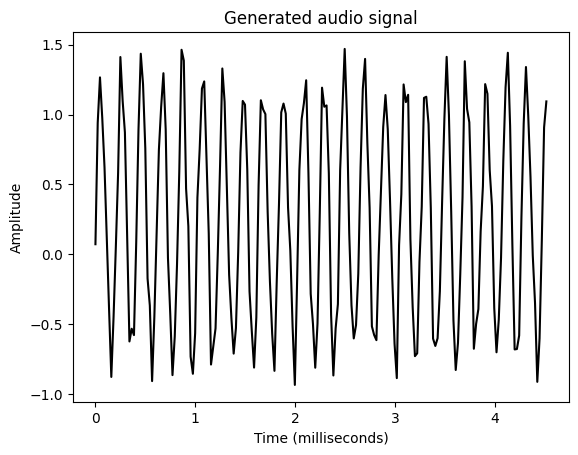

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# Output file where the audio will be saved 
output_file = 'generated_audio.wav'

# Specify audio parameters
duration = 4  # in seconds
sampling_freq = 44100  # in Hz
tone_freq = 784 
min_val = -4 * np.pi
max_val = 4 * np.pi

# Generate the audio signal
t = np.linspace(min_val, max_val, duration * sampling_freq)
signal = np.sin(2 * np.pi * tone_freq * t)

# Add some noise to the signal
noise = 0.5 * np.random.rand(duration * sampling_freq)
signal += noise

# Scale it to 16-bit integer values
scaling_factor = np.power(2, 15) - 1
signal_normalized = signal / np.max(np.abs(signal))
signal_scaled = np.int16(signal_normalized * scaling_factor)

# Save the audio signal in the output file 
write(output_file, sampling_freq, signal_scaled)

# Extract the first 200 values from the audio signal 
signal = signal[:200]

# Construct the time axis in milliseconds
time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq) 

# Plot the audio signal
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Generated audio signal')
plt.show()



Ce bloc de code pr√©c√©dent g√©n√®re un signal audio, y ajoute du bruit, le normalise et l‚Äôenregistre sous forme de fichier WAV. Il commence par d√©finir les param√®tres audio, notamment la dur√©e du son (4 secondes), la fr√©quence d‚Äô√©chantillonnage (44100 Hz) et la fr√©quence du son (784 Hz). Ensuite, il cr√©e un signal sinuso√Ødal √† l‚Äôaide de la fonction sin(), qui repr√©sente une onde sonore pure.

Pour rendre le signal plus r√©aliste, un bruit al√©atoire est ajout√©. Le signal est ensuite mis √† l‚Äô√©chelle en valeurs enti√®res 16 bits pour correspondre au format audio standard. Une fois le signal converti et normalis√©, il est enregistr√© sous forme de fichier WAV gr√¢ce √† write().

Enfin, pour la visualisation, seules les 200 premi√®res valeurs du signal sont extraites. L‚Äôaxe temporel est converti en millisecondes, et le signal est affich√© sous forme de courbe pour observer l'√©volution de l'onde g√©n√©r√©e. Ce code est utile pour g√©n√©rer des sons synth√©tiques et tester des algorithmes de traitement du signal audio.

---

In [32]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import os

# Fonction pour g√©n√©rer un signal audio sinuso√Ødal
def tone_synthesizer(freq, duration, amplitude=0.5, sampling_freq=44100):
    """
    G√©n√®re une onde sinuso√Ødale pour une fr√©quence donn√©e.

    :param freq: Fr√©quence de la note (Hz)
    :param duration: Dur√©e du son (secondes)
    :param amplitude: Amplitude du signal (0 √† 1)
    :param sampling_freq: Fr√©quence d'√©chantillonnage (Hz)
    :return: Signal audio sous forme de tableau numpy int16
    """
    # Construire l'axe temporel
    time_axis = np.linspace(0, duration, int(duration * sampling_freq), endpoint=False)

    # G√©n√©rer le signal audio
    signal = amplitude * np.sin(2 * np.pi * freq * time_axis)

    # Convertir en int16 pour stockage dans un fichier WAV
    return (signal * 32767).astype(np.int16)

if __name__ == '__main__':
    # D√©finition des fichiers de sortie
    file_tone_single = r'C:\Users\smain\Downloads\apple02.wav'
    file_tone_sequence = r'C:\Users\smain\Downloads\apple02_sequence.wav'
    mapping_file = r'C:\Users\smain\Downloads\tone_mapping.json'  # Chemin du fichier JSON

    # V√©rifier si le fichier JSON existe
    if not os.path.exists(mapping_file):
        raise FileNotFoundError(f"‚ùå ERREUR : Le fichier {mapping_file} est introuvable !")

    # Lire et afficher le contenu du JSON
    with open(mapping_file, 'r') as f:
        try:
            tone_map = json.load(f)  # Charger le JSON
            print("‚úÖ JSON charg√© avec succ√®s :", tone_map)
        except json.JSONDecodeError as e:
            raise ValueError(f"‚ùå ERREUR : Le fichier JSON est invalide !\n{e}")

    # G√©n√©rer un son unique pour la note "F"
    tone_name = 'F'
    duration = 3  # secondes
    amplitude = 0.5  # Normalisation (√©vite saturation)
    sampling_freq = 44100  # Hz

    # V√©rifier si la note est bien dans le JSON
    if tone_name not in tone_map:
        raise ValueError(f"‚ùå ERREUR : La note {tone_name} n'est pas d√©finie dans tone_mapping.json")

    # Extraire la fr√©quence et g√©n√©rer le son
    tone_freq = tone_map[tone_name]
    synthesized_tone = tone_synthesizer(tone_freq, duration, amplitude, sampling_freq)

    # Enregistrer le fichier audio simple
    write(file_tone_single, sampling_freq, synthesized_tone)
    print(f"‚úÖ Fichier g√©n√©r√© avec succ√®s : {file_tone_single}")

    # D√©finir une s√©quence de notes avec dur√©es
    tone_sequence = [('G', 0.4), ('D', 0.5), ('F', 0.3), ('C', 0.6), ('A', 0.4)]

    # Construire un signal audio bas√© sur cette s√©quence
    signal = np.array([], dtype=np.int16)

    for item in tone_sequence:
        tone_name, duration = item

        # V√©rifier si la note est dans le fichier JSON
        if tone_name not in tone_map:
            raise ValueError(f"‚ùå ERREUR : La note {tone_name} n'est pas d√©finie dans tone_mapping.json")

        # Extraire la fr√©quence
        freq = tone_map[tone_name]

        # G√©n√©rer le signal
        synthesized_tone = tone_synthesizer(freq, duration, amplitude, sampling_freq)

        # Ajouter le signal au fichier final
        signal = np.append(signal, synthesized_tone)

    # Sauvegarder la s√©quence en fichier WAV
    write(file_tone_sequence, sampling_freq, signal)
    print(f"‚úÖ S√©quence g√©n√©r√©e avec succ√®s : {file_tone_sequence}")


‚úÖ JSON charg√© avec succ√®s : {'C': 261.63, 'C#': 277.18, 'D': 293.66, 'D#': 311.13, 'E': 329.63, 'F': 349.23, 'F#': 369.99, 'G': 392.0, 'G#': 415.3, 'A': 440.0, 'A#': 466.16, 'B': 493.88}
‚úÖ Fichier g√©n√©r√© avec succ√®s : C:\Users\smain\Downloads\apple02.wav
‚úÖ S√©quence g√©n√©r√©e avec succ√®s : C:\Users\smain\Downloads\apple02_sequence.wav


Ce bloc de code pr√©c√©dent g√©n√®re et enregistre des sons sinuso√Ødaux √† partir d‚Äôun fichier JSON contenant un mappage de notes et de fr√©quences. Il commence par d√©finir une fonction tone_synthesizer() qui cr√©e une onde sinuso√Ødale en fonction d‚Äôune fr√©quence et d‚Äôune dur√©e donn√©es.

Ensuite, il v√©rifie l'existence du fichier JSON et le charge pour r√©cup√©rer les fr√©quences associ√©es aux notes musicales. Il g√©n√®re un son unique pour la note "F" en utilisant la fr√©quence correspondante et l‚Äôenregistre sous forme de fichier WAV.

Une s√©quence de notes est ensuite d√©finie avec des dur√©es sp√©cifiques. Pour chaque note, le programme v√©rifie sa pr√©sence dans le fichier JSON, g√©n√®re le signal sinuso√Ødal correspondant, puis concat√®ne tous les sons pour former une s√©quence musicale. Ce signal est enfin enregistr√© sous forme de fichier audio WAV.

Ce programme est utile pour synth√©tiser et manipuler des sons bas√©s sur des fr√©quences musicales, par exemple pour la g√©n√©ration de m√©lodies artificielles.

---

In [29]:
import os

mapping_file = r'C:\Users\smain\Downloads\tone_mapping.json'  # Chemin absolu


# V√©rifier si le fichier existe
if not os.path.exists(mapping_file):
    print(f"‚ùå Le fichier {mapping_file} est introuvable !")
    raise FileNotFoundError(f"Le fichier {mapping_file} est manquant.")
else:
    print(f"‚úÖ Le fichier {mapping_file} a √©t√© trouv√© !")

# Ouvrir le fichier et afficher son contenu
with open(mapping_file, 'r') as f:
    content = f.read()

# Afficher le contenu pour voir s'il est correct
print("üìÑ Contenu du fichier JSON:")
print(content)

# Charger le JSON
tone_map = json.loads(content)
print("‚úÖ JSON charg√© avec succ√®s !")


‚úÖ Le fichier C:\Users\smain\Downloads\tone_mapping.json a √©t√© trouv√© !
üìÑ Contenu du fichier JSON:
{
    "C": 261.63,
    "C#": 277.18,
    "D": 293.66,
    "D#": 311.13,
    "E": 329.63,
    "F": 349.23,
    "F#": 369.99,
    "G": 392.00,
    "G#": 415.30,
    "A": 440.00,
    "A#": 466.16,
    "B": 493.88
}

‚úÖ JSON charg√© avec succ√®s !


In [4]:
!pip install python_speech_features


Using legacy 'setup.py install' for python-speech-features, since package 'wheel' is not installed.
    Running setup.py install for python-speech-features: started
    Running setup.py install for python-speech-features: finished with status 'done'


You should consider upgrading via the 'C:\Users\smain\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



‚úÖ MFCC:
Nombre de fen√™tres = 22
Longueur de chaque fen√™tre = 13

‚úÖ Filter bank:
Nombre de fen√™tres = 22
Longueur de chaque fen√™tre = 26


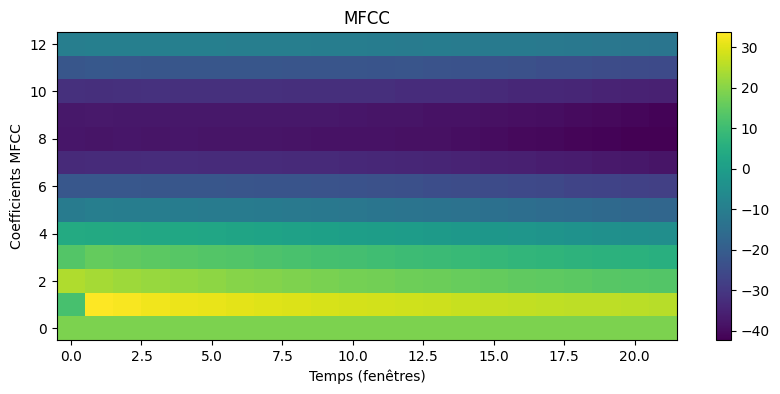

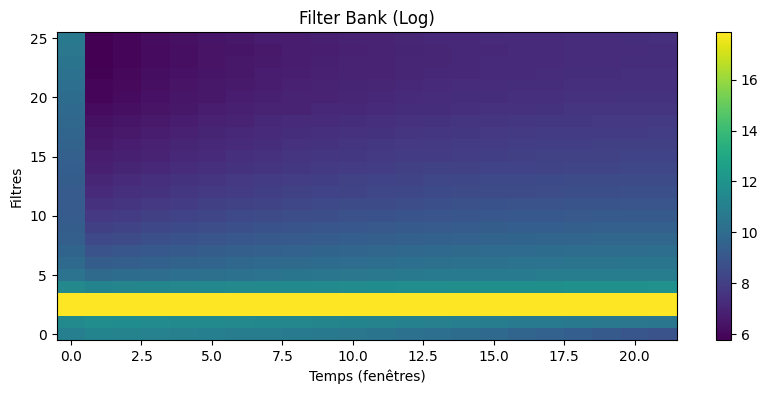

In [6]:
# Installer python_speech_features si n√©cessaire : pip install python_speech_features
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile 
from python_speech_features import mfcc, logfbank

# D√©finition du chemin du fichier audio
file_path = r'C:\Users\smain\Downloads\apple02.wav'

# V√©rifier si le fichier existe
if not os.path.exists(file_path):
    raise FileNotFoundError(f"‚ùå ERREUR : Le fichier {file_path} est introuvable !")

# Lire le fichier audio
sampling_freq, signal = wavfile.read(file_path)

# V√©rifier si l'audio est en mono ou st√©r√©o
if len(signal.shape) > 1:
    print("üîÑ Conversion en mono...")
    signal = np.mean(signal, axis=1).astype(np.int16)  # Convertir en mono

# Prendre les 10 000 premiers √©chantillons pour l'analyse
signal = signal[:10000]

# V√©rifier que le signal est bien en int16 (√©vite erreurs MFCC)
signal = signal.astype(np.int16)

# Extraire les coefficients MFCC
features_mfcc = mfcc(signal, sampling_freq)

# Afficher les dimensions des MFCC
print('\n‚úÖ MFCC:')
print(f'Nombre de fen√™tres = {features_mfcc.shape[0]}')
print(f'Longueur de chaque fen√™tre = {features_mfcc.shape[1]}')

# Extraire les coefficients de la banque de filtres
features_fb = logfbank(signal, sampling_freq)

# Afficher les dimensions des filtres en banque logarithmique
print('\n‚úÖ Filter bank:')
print(f'Nombre de fen√™tres = {features_fb.shape[0]}')
print(f'Longueur de chaque fen√™tre = {features_fb.shape[1]}')

# Transposer les donn√©es pour une meilleure visualisation
features_mfcc = features_mfcc.T
features_fb = features_fb.T

# Affichage des MFCC
plt.figure(figsize=(10, 4))
plt.imshow(features_mfcc, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Temps (fen√™tres)')
plt.ylabel('Coefficients MFCC')

# Affichage de la banque de filtres
plt.figure(figsize=(10, 4))
plt.imshow(features_fb, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar()
plt.title('Filter Bank (Log)')
plt.xlabel('Temps (fen√™tres)')
plt.ylabel('Filtres')

# Affichage final
plt.show()





Le bloc de code pr√©c√©dent effectue une analyse des caract√©ristiques audio en extrayant les coefficients MFCC et les banques de filtres logarithmiques d‚Äôun fichier WAV. Il commence par v√©rifier l‚Äôexistence du fichier audio, puis le charge avec SciPy (wavfile.read()). Si le fichier est st√©r√©o, il est converti en mono en moyennant les canaux.

Seuls les 10 000 premiers √©chantillons sont conserv√©s pour l‚Äôanalyse. Les MFCC (Mel-Frequency Cepstral Coefficients) sont extraits, ce qui permet d‚Äôobtenir une repr√©sentation compacte des fr√©quences per√ßues par l‚Äôoreille humaine. Ensuite, les coefficients de la banque de filtres logarithmiques sont √©galement calcul√©s, fournissant une analyse spectrale plus d√©taill√©e.

Les r√©sultats sont affich√©s sous forme de spectrogrammes avec Matplotlib, o√π les MFCC et la banque de filtres sont visualis√©s en fonction du temps. Ce type d'analyse est essentiel en traitement du signal audio et en reconnaissance vocale pour capturer les caract√©ristiques pertinentes du son. 